### Average over multiple runs  - Phase noise only - Method 1
Plot the emittance growth in the presence of phase and amplitude noise (PN and AN respectively). The simulation for each set of parameters is repeated multiple times. The mean and the standard deviation of the emittance values are computed over all runs (part 3) for each turn. The normalised emittance is used here. 

In [86]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [87]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [122]:
n_runs = 30 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [123]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/output/'
PN_name_template = 'tbt_SPS_noCC_amplitude_noise1e-8_1e5Nb_1e5turns_VRF2_37MV_'
#PN_name_template = 'tbt_SPS_noCC_phase_noise1e-8_1e5Nb_1e5turns_VRF_2_37MV_'
type_of_noise = 'AN'

In [124]:
# phase noise
ex_dict_pn = {} # type: dictionary
ey_dict_pn = {}

for run in range(n_runs):
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    # A. load the turn by turn data in a dictionary
    temp_dict_pn = pickle.load( open( path_to_data+PN_name_template+temp_name+'.pkl', "rb" ) )
    # B. Create a different list for each run and save the emittance values
    ex_dict_pn[temp_name] = temp_dict_pn['neps_x'] # ΑΝ
    ey_dict_pn[temp_name] = temp_dict_pn['neps_y']

#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [125]:
ex_mean_pn = []
ey_mean_pn = []

ex_std_pn = []
ey_std_pn = []


for turn in range(int(turns)):
    ex_temp_pn = []
    ey_temp_pn = []

    # keep all the emittance values for all the runs
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1)
        ex_temp_pn.append(ex_dict_pn[temp_name][turn])
        ey_temp_pn.append(ey_dict_pn[temp_name][turn])
    # calculate and append the mean of the emittance value for every turn
    ex_mean_pn.append(np.mean(ex_temp_pn))
    ey_mean_pn.append(np.mean(ey_temp_pn))
    # calculate and append the standard deviation of the emittance value for every turn
    ex_std_pn.append(np.std(ex_temp_pn))
    ey_std_pn.append(np.std(ey_temp_pn))    

#### 3) Convert turns to time [s]

In [126]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

#### 4) Plot evolution of the H (horizontal emittance) emittance

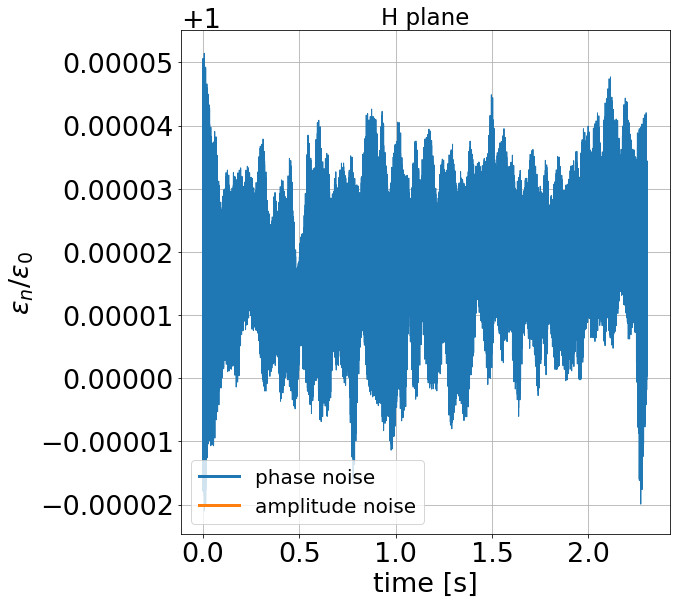

In [10]:
plt.plot(time, ex_mean_pn/ex_mean_pn[0], c='C0')
plt.plot(1,1,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(1,1,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_n / \epsilon_0$')
plt.title('H plane')
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 5) Plot evolution of the V (vertical emittance) emittance

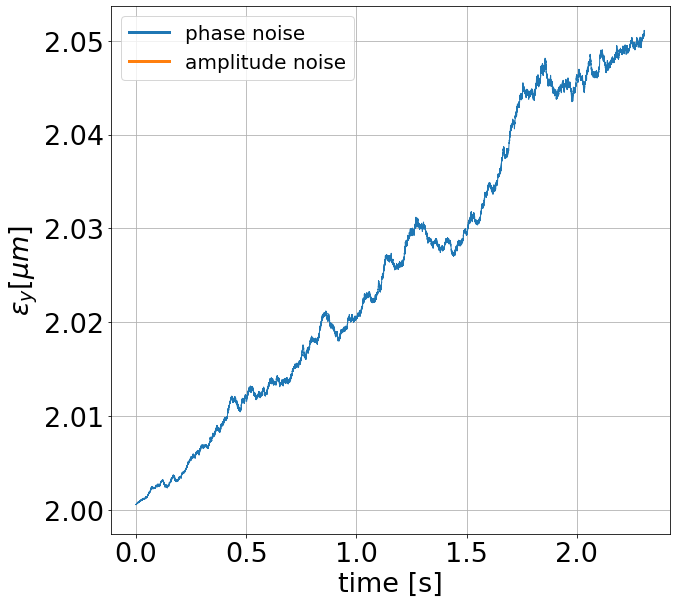

In [13]:
plt.plot(time, np.array(ey_mean_pn)*1e6, c='C0')    
plt.plot(2,2,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(2,2,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane)

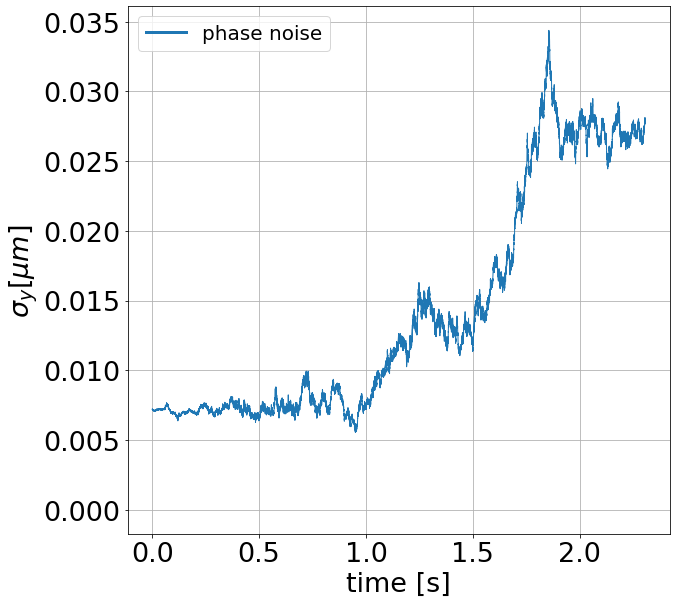

In [21]:
plt.plot(time, np.array(ey_std_pn)*1e6, c='C0')   
plt.plot(0,0,c='C0',  label = 'phase noise', linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Calculate the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [127]:
# linear fit
[m_pn, b_pn], cov_pn = np.polyfit(time, ey_mean_pn, 1, cov=True)
# compute the error of the gradient of the fit slope
err_pn = np.sqrt(np.diag(cov_pn))

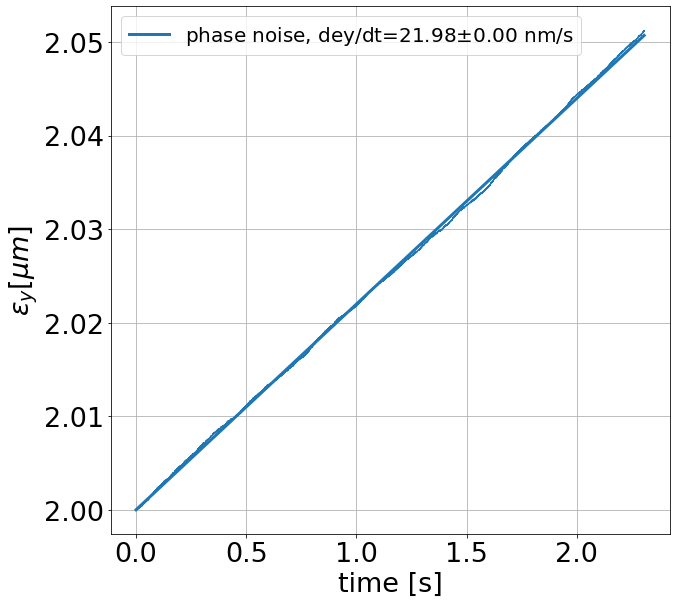

In [31]:
plt.plot(time, np.array(ey_mean_pn)*1e6, c='C0')
plt.plot(time, (m_pn*time+b_pn)*1e6, c = 'C0', label='phase noise, dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 3)

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

#### 8) Plot fill between

In [128]:
if type_of_noise == 'PN':
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
    expected_growth = 24e-9 # m/s, expected rate from analytical calculations 
else:
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
    expected_growth = 22e-9 # m/s, expected rate from analytical calculations 

#### A) y axis emittance values

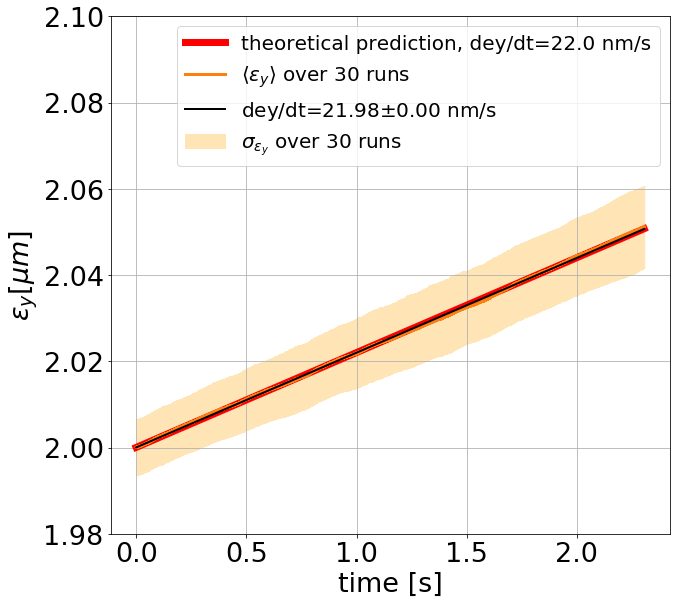

In [129]:
# std over all runs
plt.fill_between(time, np.array(ey_mean_pn)*1e6 - np.array(ey_std_pn)*1e6, np.array(ey_mean_pn)*1e6 + np.array(ey_std_pn)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(time, (expected_growth*time+b_pn)*1e6, c='r', linewidth=7, label='theoretical prediction, dey/dt={} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(time, np.array(ey_mean_pn)*1e6, c=my_color, linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(time, (m_pn*time+b_pn)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 2)



plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(1.98, 2.10)
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}run_fill_between_v2.png'.format(type_of_noise, n_runs))

#### B) y axis emittance values after substracting the initial emittance

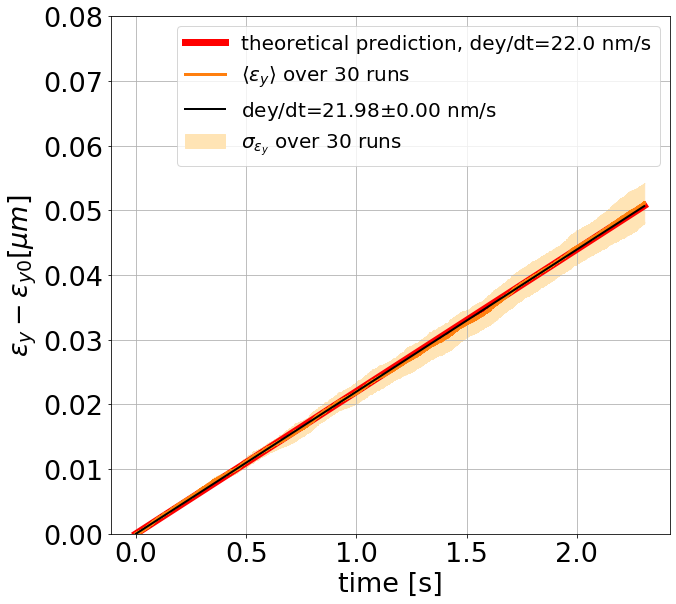

In [131]:
initial_std = ey_std_pn[0]
initial_mean_emittance = ey_mean_pn[0]
# std over all runs
plt.fill_between(time, np.array(ey_mean_pn-initial_mean_emittance )*1e6 - np.array(ey_std_pn-initial_std)*1e6, np.array(ey_mean_pn-initial_mean_emittance)*1e6 + np.array(ey_std_pn-initial_std)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(time, (expected_growth*time)*1e6, c='r', linewidth=7, label='theoretical prediction, dey/dt={} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(time, np.array(ey_mean_pn-initial_mean_emittance)*1e6, c=my_color, linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(time, (m_pn*time)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 2)



plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y - \epsilon_{y0} [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(0, 0.08)
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emit_growth_rate_substract_initial_emittance_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}run_fill_between.png'.format(type_of_noise, n_runs))